Let's classify a K2 star

In [1]:
import warnings
warnings.filterwarnings('ignore')
import lightkurve as lk

In [2]:
target = 'EPIC 201367296'

datalist = lk.search_lightcurvefile(target, cadence='short')
datalist

SearchResult containing 1 data products.

 target_name       productFilename                   description              distance
------------- -------------------------- ------------------------------------ --------
ktwo201367296 ktwo201367296-c01_slc.fits Lightcurve Short Cadence (KSC) - C01      0.0

In [25]:
lc = datalist.download().PDCSAP_FLUX.normalize().remove_nans().flatten().remove_outliers()

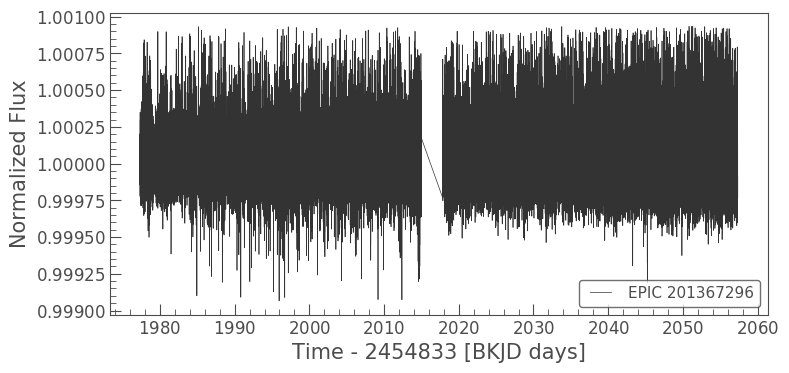

In [26]:
lc.plot()

In [31]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=800, maximum_frequency=1600)

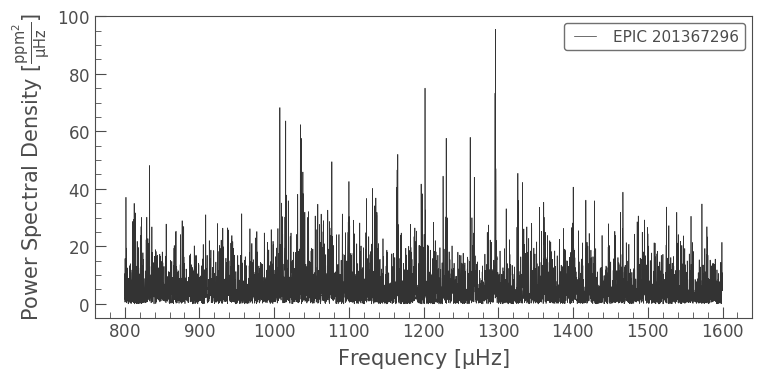

In [32]:
pg.plot()

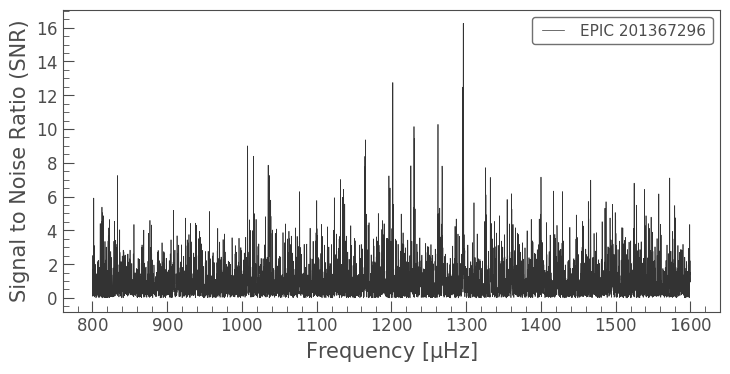

In [33]:
snr = pg.flatten()
snr.plot()

In [34]:
butler = snr.to_seismology()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d73cc50>,
      dtype=object)

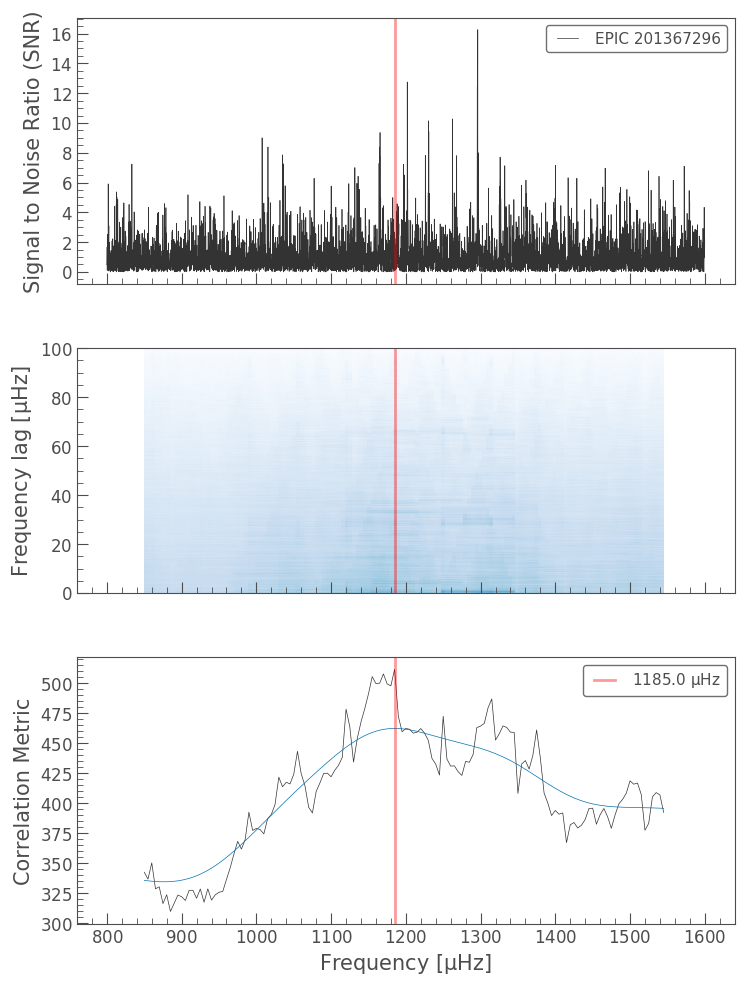

In [40]:
butler.estimate_numax(window=100, spacing=5)
butler.diagnose_numax()

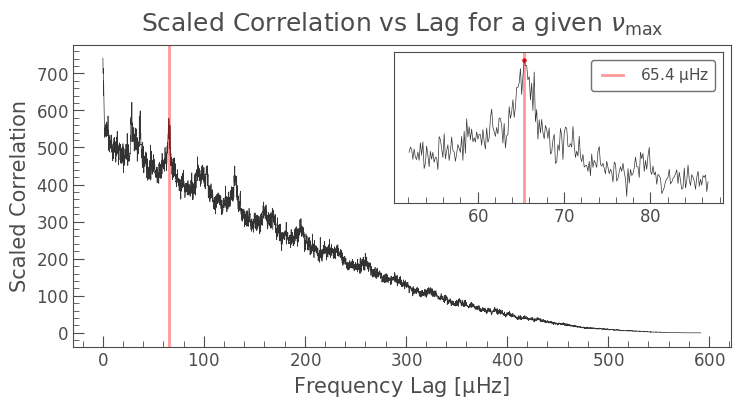

In [41]:
butler.estimate_deltanu()
butler.diagnose_deltanu()

In [43]:
teff = 5695
butler.estimate_mass(teff)


<SeismologyQuantity 1.00722493 solMass>

In [44]:
butler.estimate_radius(teff)


<SeismologyQuantity 1.62607827 solRad>

In [45]:
butler.estimate_logg(teff)

<SeismologyQuantity 4.0189112 dex>